In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt

In [16]:
"""
# termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*7,3), np.float32)
objp[:,:2] = np.mgrid[0:7,0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.
images = glob.glob('data/*.jpg')
for fname in images:
    print(fname)
    img = cv2.imread(images[0])#fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    ret, corners = cv2.findChessboardCorners(gray, (9,6),None)
    if ret == True:
        objpoints.append(objp)
        corners2 = cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)
        imgpoints.append(corners2)

        #img = cv2.drawChessboardCorners(img, (9,6), corners,ret)
        img = cv2.drawChessboardCorners(img, (9,6), corners2,ret)
        plt.imshow(img)
#cv2.destroyAllWindows()
"""

"\n# termination criteria\ncriteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)\n\n# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)\nobjp = np.zeros((6*7,3), np.float32)\nobjp[:,:2] = np.mgrid[0:7,0:6].T.reshape(-1,2)\n\n# Arrays to store object points and image points from all the images.\nobjpoints = [] # 3d point in real world space\nimgpoints = [] # 2d points in image plane.\nimages = glob.glob('data/*.jpg')\nfor fname in images:\n    print(fname)\n    img = cv2.imread(images[0])#fname)\n    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)\n    ret, corners = cv2.findChessboardCorners(gray, (9,6),None)\n    if ret == True:\n        objpoints.append(objp)\n        corners2 = cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)\n        imgpoints.append(corners2)\n\n        #img = cv2.drawChessboardCorners(img, (9,6), corners,ret)\n        img = cv2.drawChessboardCorners(img, (9,6), corners2,ret)\n        plt.imshow(img)\n#cv2.destroyAllWindows

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:23: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


1


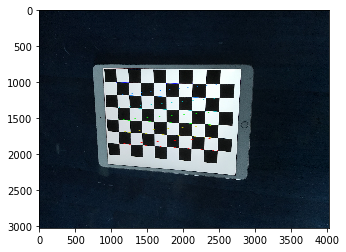

In [2]:
import cv2
import numpy as np
import glob
  
# 设置寻找亚像素角点的参数，采用的停止准则是最大循环次数30和最大误差容限0.001
criteria = (cv2.TERM_CRITERIA_MAX_ITER | cv2.TERM_CRITERIA_EPS, 50, 0.001)
  
# 获取标定板角点的位置
objp = np.zeros((9*6,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)  # 将世界坐标系建在标定板上，所有点的Z坐标全部为0，所以只需要赋值x和y
 
obj_points = []    # 存储3D点
img_points = []    # 存储2D点
images = glob.glob('data/*.jpg')
img = cv2.imread(images[0])
#img = cv2.imread('60790b2ee81c7e1d359f97a058779454.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
size = gray.shape[::-1]
ret,corners = cv2.findChessboardCorners(gray, (9,6), None)
if ret:
    obj_points.append(objp)
    corners2 = cv2.cornerSubPix(gray, corners, (11,11), (-1,-1), criteria)  # 在原角点的基础上寻找亚像素角点
    if corners2!=[]:
        img_points.append(corners2)
    else:
        img_points.append(corners)
  
    cv2.drawChessboardCorners(img, (9,6), corners, ret)   # 记住，OpenCV的绘制函数一般无返回值
    #cv2.imshow('img', img)
    plt.imshow(img)
    #cv2.waitKey(50)

    
print(len(img_points))
cv2.destroyAllWindows()

In [18]:
def draw(img, corners, imgpts):
    corner = tuple(corners[0].ravel())
    img = cv2.line(img, corner, tuple(imgpts[0].ravel()), (255,0,0), 5)
    img = cv2.line(img, corner, tuple(imgpts[1].ravel()), (255,0,0), 5)
    img = cv2.line(img, corner, tuple(imgpts[2].ravel()), (255,0,0), 5)
    return img

In [19]:
# termination criteria 設置終止條件
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

objp = np.zeros((6*8,3), np.float32)
objp[:,:2] = np.mgrid[0:8,0:6].T.reshape(-1,2)
axis = np.float32([[3,0,0], [0,3,0], [0,0,-3]]).reshape(-1,3)

In [20]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(obj_points, img_points,size, None, None)
  
print("ret:"+str(ret))
print("mtx:\n"+str(mtx))        # 内参数矩阵
print("dist:\n"+str(dist))      # 畸变系数   distortion cofficients = (k_1,k_2,p_1,p_2,k_3)
print("rvecs:\n"+str(rvecs))    # 旋转向量  # 外参数
print("tvecs:\n"+str(tvecs))    # 平移向量  # 外参数

ret:1.2537909484066458
mtx:
[[2.10964281e+03 0.00000000e+00 2.00596784e+03]
 [0.00000000e+00 1.57320242e+03 1.44632835e+03]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
dist:
[[ 0.01071436  0.0175889  -0.00319116 -0.00060631 -0.00658842]]
rvecs:
[array([[-0.37748201],
       [-0.3427445 ],
       [-1.44885436]])]
tvecs:
[array([[-2.41027334],
       [ 0.70739558],
       [ 4.45684252]])]


In [21]:
def draw2(img, corners, imgpts):
    imgpts = np.int32(imgpts).reshape(-1,2)
    # draw ground floor in green
    img = cv2.drawContours(img, [imgpts[:4]],-1,(0,255,0),-3)
    # draw pillars in blue color
    for i,j in zip(range(4),range(4,8)):
        img = cv2.line(img, tuple(imgpts[i]), tuple(imgpts[j]),(255),3)
        # draw top layer in red color
        img = cv2.drawContours(img, [imgpts[4:]],-1,(0,0,255),3)
    return img

In [22]:
axis = np.float32([[0,0,0], [0,3,0], [3,3,0], [3,0,0],[0,0,-3],[0,3,-3],[3,3,-3],[3,0,-3] ])

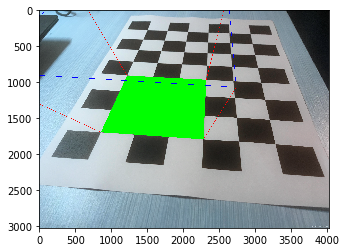

In [23]:
images = glob.glob('data/*.jpg')
fname = images[1]
img = cv2.imread('60790b2ee81c7e1d359f97a058779454.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, corners = cv2.findChessboardCorners(gray, (8,6), None)
if ret == True:
    corners2 = cv2.cornerSubPix(gray,corners, (11,11), (-1,-1), criteria)
    # Find the rotation and translation vectors.
    # project 3D points to image plane.
    retval, rvecs, tvecs, inliers  = cv2.solvePnPRansac(objp, corners2, mtx, dist)
    imgpts, jac = cv2.projectPoints(axis, rvecs, tvecs, mtx, dist)
    img = draw2(img,corners2,imgpts)
    plt.imshow(img)

In [24]:
# termination criteria 設置終止條件
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

objp = np.zeros((6*8,3), np.float32)
objp[:,:2] = np.mgrid[0:8,0:6].T.reshape(-1,2)
axis = np.float32([[3,0,0], [0,3,0], [0,0,-3]]).reshape(-1,3)

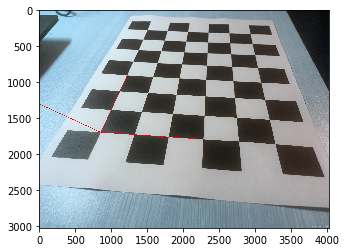

In [25]:
fname = '60790b2ee81c7e1d359f97a058779454.jpg'
img = cv2.imread(fname)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, corners = cv2.findChessboardCorners(gray, (8,6), None)
if ret == True:
    corners2 = cv2.cornerSubPix(gray,corners, (11,11), (-1,-1), criteria)
    # Find the rotation and translation vectors.
    # project 3D points to image plane.
    retval, rvecs, tvecs, inliers  = cv2.solvePnPRansac(objp, corners2, mtx, dist)
    imgpts, jac = cv2.projectPoints(axis, rvecs, tvecs, mtx, dist)
    img = draw(img,corners2,imgpts)
    plt.imshow(img)

array([[ 0.90983396],
       [-0.24245749],
       [-6.45731615]])

In [ ]:
import cv2
import numpy as np
import glob

# 设置寻找亚像素角点的参数，采用的停止准则是最大循环次数30和最大误差容限0.001
criteria = (cv2.TERM_CRITERIA_MAX_ITER | cv2.TERM_CRITERIA_EPS, 30, 0.001)

# 获取标定板角点的位置
objp = np.zeros((8 * 6, 3), np.float32)
objp[:, :2] = np.mgrid[0:16:8j, 0:12:6j].T.reshape(-1, 2)  # 将世界坐标系建在标定板上，所有点的Z坐标全部为0，所以只需要赋值x和y
obj_points = []  # 存储3D点
img_points = []  # 存储2D点
images = glob.glob("60790b2ee81c7e1d359f97a058779454.jpg")
for fname in images:

    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    size = gray.shape[::-1]
    ret, corners = cv2.findChessboardCorners(gray, (8, 6), None)
    print(size)
    if ret:
        obj_points.append(objp)


        corners2 = cv2.cornerSubPix(gray, corners, (5, 5), (-1, -1), criteria)  # 在原角点的基础上寻找亚像素角点

        if corners2.any:
            img_points.append(corners2)
        else:
            img_points.append(corners)

        cv2.drawChessboardCorners(img, (8, 6), corners, ret)  # 记住，OpenCV的绘制函数一般无返回值
        plt.imshow(img)

print(len(img_points))

# 标定
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(obj_points, img_points, size, None, None)

print("ret:", ret)
print("mtx:\n", mtx ) # 内参数矩阵
print("dist:\n", dist)  # 畸变系数   distortion cofficients = (k_1,k_2,p_1,p_2,k_3)
print("rvecs:\n", rvecs)  # 旋转向量  # 外参数
print("tvecs:\n", tvecs)  # 平移向量  # 外参数
print("-------------------计算反向投影误差-----------------------")
tot_error = 0
for i in range(len(obj_points)):
    img_points2, _ = cv2.projectPoints(obj_points[i], rvecs[i], tvecs[i], mtx, dist)
    error = cv2.norm(img_points[i], img_points2, cv2.NORM_L2) / len(img_points2) #像素坐标的方差
    tot_error += error

mean_error = tot_error / len(obj_points)
print("total error: ", tot_error)  #13.38
print("mean error: ", mean_error)  #1.34
#鉴于Iphone6s相机分辨率为3024*4032，1.34的平均重投影像素误差自己感觉基本可以接受

In [ ]:
# 使用 cv2.calibrateCamera() 進行標定
# 這個函數會返回標定結果、相機的內參數矩陣、畸變係數、旋轉矩陣和平移向量
images = glob.glob('data/*.jpg')
fname = images[1]
img = cv2.imread(fname)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, corners = cv2.findChessboardCorners(gray, (8,6), None)
if ret == True:
    corners2 = cv2.cornerSubPix(gray, corners, (5, 5), (-1, -1), criteria)  # 在原角点的基础上寻找亚像素角点
    # Find the rotation and translation vectors.
    # project 3D points to image plane.
    _, rvecs, tvecs, inliers  = cv2.solvePnPRansac(objp, corners2, mtx, dist)
    imgpts, jac = cv2.projectPoints(axis, rvecs, tvecs, mtx, dist)
    cv2.drawChessboardCorners(img, (8, 6), corners, ret)  # 记住，OpenCV的绘制函数一般无返回值
    img = draw(img,corners2,imgpts)
    plt.imshow(img)